**Customer Churn**

In [210]:
#Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from lifelines import KaplanMeierFitter
labelencoder = LabelEncoder()

In [141]:
dataset = pd.read_csv("../dataset/dataset.csv")

In [142]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [143]:
dataset = dataset.drop(columns='customerID')

In [144]:
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [145]:
dataset.shape

(7043, 20)

In [146]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [147]:
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors="coerce")

In [148]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [149]:
dataset["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [150]:
dataset["PaymentMethod"] = dataset["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

In [151]:
dataset["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [152]:
dataset.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [153]:
value_na = [value for value in dataset.columns if dataset[value].isnull().sum() > 1]

In [154]:
dataset[dataset[value_na[0]].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card,56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [155]:
dataset['MultipleLines'] = dataset['MultipleLines'].replace(to_replace='No phone service', value='No service')
dataset.loc[:, ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = dataset.loc[:, ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].replace(to_replace='No internet service', value='No service')

In [156]:
categorical_columns_ordinal_1 = [
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling',
    'Churn'
]
categorical_columns_ordinal_2 = [
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

In [157]:
ordinal_map_1 = {
    'Yes': 1,
    'No': 0
}
ordinal_map_2 = {
    'Yes': 1,
    'No': 0,
    'No service': -1
}
ordinal_map_3 = {
    'Fiber optic': 1,
    'DSL': 0,
    'No': -1
}
ordinal_map_4 = {
    'Two year': 2,
    'One year': 1,
    'Month-to-month': 0
}
ordinal_map_5 = {
    'Female': 1,
    'Male': 0
}
ordinal_map_6 = {
    'Electronic check': 1,
    'Mailed check': 0,
    'Bank transfer': 2, 
    'Credit card': 3
}

In [158]:
for col in categorical_columns_ordinal_1:
    dataset[col] = dataset[col].map(ordinal_map_1)

for col in categorical_columns_ordinal_2:
    dataset[col] = dataset[col].map(ordinal_map_2)

dataset['InternetService'] = dataset['InternetService'].map(ordinal_map_3)
dataset['Contract'] = dataset['Contract'].map(ordinal_map_4)
dataset['gender'] = dataset['gender'].map(ordinal_map_5)
dataset['PaymentMethod'] = dataset['PaymentMethod'].map(ordinal_map_6)

In [159]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,-1,0,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,0,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,0,56.95,1889.50,0
2,0,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,0,0,0,0,45,0,-1,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,1,70.70,151.65,1


In [160]:
target = dataset[dataset[value_na[0]].isnull()]
target.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,1,1,0,0,-1,0,1,0,1,1,1,0,2,1,2,52.55,NaN,0
753,0,0,0,1,0,1,0,-1,-1,-1,-1,-1,-1,-1,2,0,0,20.25,NaN,0
936,1,0,1,1,0,1,0,0,1,1,1,0,1,1,2,0,0,80.85,NaN,0
1082,0,0,1,1,0,1,1,-1,-1,-1,-1,-1,-1,-1,2,0,0,25.75,NaN,0
1340,1,0,1,1,0,0,-1,0,1,1,1,1,1,0,2,0,3,56.05,NaN,0


In [161]:
dataset.dropna(inplace=True)

In [162]:
dataset[dataset[value_na[0]].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [163]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,-1,0,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,0,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,0,56.95,1889.50,0
2,0,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,0,0,0,0,45,0,-1,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,1,70.70,151.65,1


In [164]:
dataset.info(())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

<Axes: xlabel='timeline'>

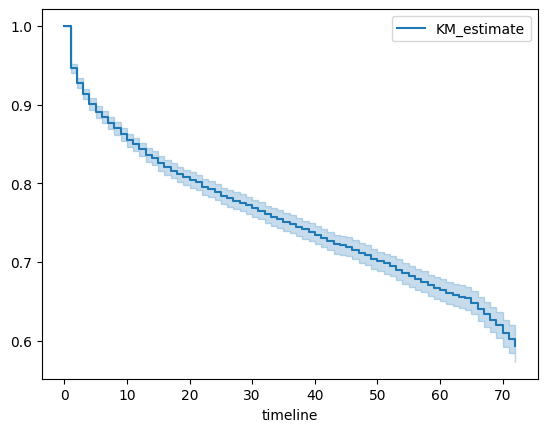

In [242]:
kmf = KaplanMeierFitter()
kmf.fit(durations = dataset["tenure"], event_observed = dataset["Churn"])
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

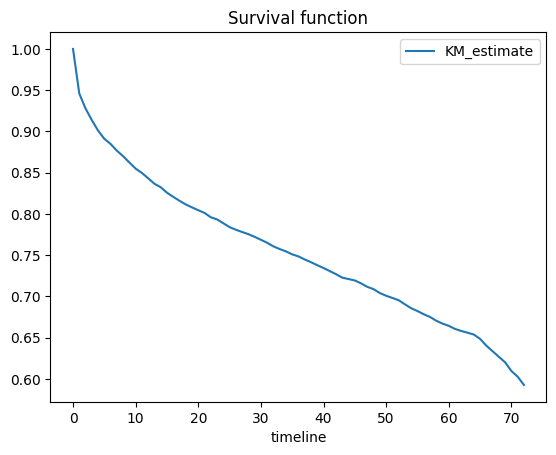

In [243]:
kmf.survival_function_.plot()
plt.title('Survival function')

<Axes: xlabel='timeline'>

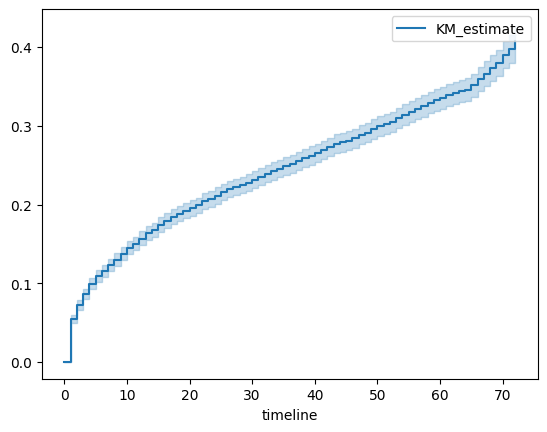

In [244]:
kmf.plot_cumulative_density()

In [245]:
from lifelines.utils import median_survival_times

In [246]:
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print("Median Survival Time:", median_)
print("Median Confidence Interval:", median_confidence_interval_)

Median Survival Time: inf
Median Confidence Interval:      KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                     inf                     inf


In [172]:
dataset.Churn = labelencoder.fit_transform(dataset.Churn)
dataset.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [173]:
eventvar = dataset['Churn']
timevar = dataset['tenure']

In [174]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

survivaldata = pd.get_dummies(dataset, columns = categorical, drop_first= True)
survivaldata.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_1,SeniorCitizen_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_0,...,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,1,29.85,29.85,0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,True,False,False
1,34,56.95,1889.50,0,False,False,False,False,True,True,...,True,False,True,False,True,False,False,False,False,False
2,2,53.85,108.15,1,False,False,False,False,True,True,...,True,False,True,False,False,False,True,False,False,False
3,45,42.30,1840.75,0,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,True,False
4,2,70.70,151.65,1,True,False,False,False,True,True,...,True,False,True,False,False,False,True,True,False,False


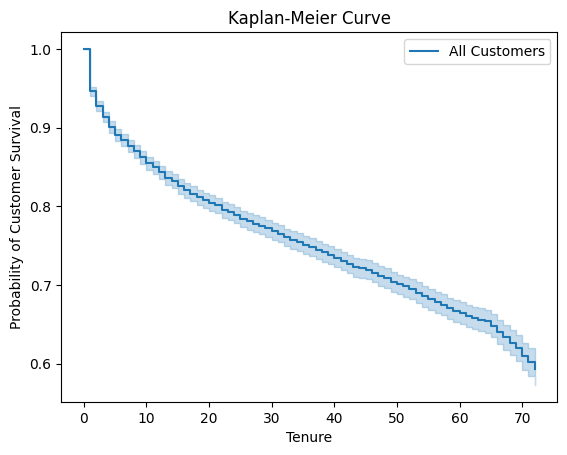

In [175]:
kmf = KaplanMeierFitter()
kmf.fit(timevar,event_observed = eventvar,label = "All Customers")
kmf.plot()
plt.ylabel('Probability of Customer Survival')
plt.xlabel('Tenure')
plt.title('Kaplan-Meier Curve');

In [176]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,-1,0,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,0,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,0,56.95,1889.50,0
2,0,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,0,0,0,0,45,0,-1,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,1,70.70,151.65,1


In [177]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(dataset, duration_col='tenure', event_col='Churn')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -12677.57
         time fit was run = 2024-04-09 14:02:46 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
gender            0.03      1.03      0.05           -0.06            0.13                0.94                1.13
SeniorCitizen     0.04      1.04      0.06           -0.07            0.15                0.93                1.16
Partner          -0.18      0.83      0.05           -0.29           -0.08                0.75                0.93
Dependents       -0.09      0.91      0.07           -0.23            0.05                0.80                1.05
PhoneService      1.12      3.05      0.17            0.77            1.46                2.17                4.29
MultipleLines     0.20      1.22      0.06            0.08            0.32                1.09                1.38
InternetService   1.64      5.15      0.14            1.37            1.91                3.94                6.72
OnlineSecurity   -0.08      0.92      0.06           -0.20            0.04                0.82                1.04
OnlineBackup      0.08      1.08      0.05           -0.03            0.19                0.97                1.20
DeviceProtection  0.22      1.25      0.06            0.11            0.33                1.12                1.39
TechSupport       0.05      1.05      0.06           -0.08            0.17                0.93                1.18
StreamingTV       0.54      1.72      0.08            0.39            0.69                1.48                1.99
StreamingMovies   0.54      1.72      0.08            0.40            0.69                1.49                2.00
Contract         -1.61      0.20      0.08           -1.77           -1.45                0.17                0.23
PaperlessBilling  0.16      1.17      0.06            0.05            0.27                1.05                1.31
PaymentMethod    -0.21      0.81      0.03           -0.26           -0.15                0.77                0.86
MonthlyCharges   -0.01      0.99      0.01           -0.02            0.00                0.98                1.00
TotalCharges     -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00

                  cmp to      z      p  -log2(p)
covariate                                       
gender              0.00   0.74   0.46      1.11
SeniorCitizen       0.00   0.74   0.46      1.12
Partner             0.00  -3.35 <0.005     10.29
Dependents          0.00  -1.31   0.19      2.40
PhoneService        0.00   6.41 <0.005     32.67
MultipleLines       0.00   3.35 <0.005     10.26
InternetService     0.00  12.01 <0.005    108.06
OnlineSecurity      0.00  -1.35   0.18      2.50
OnlineBackup        0.00   1.45   0.15      2.78
DeviceProtection    0.00   3.94 <0.005     13.58
TechSupport         0.00   0.74   0.46      1.12
StreamingTV         0.00   7.11 <0.005     39.61
StreamingMovies     0.00   7.16 <0.005     40.16
Contract            0.00 -19.69 <0.005    284.20
PaperlessBilling    0.00   2.76   0.01      7.45
PaymentMethod       0.00  -7.41 <0.005     42.80
MonthlyCharges      0.00  -1.94   0.05      4.26
TotalCharges        0.00 -38.88 <0.005       inf
---
Concordance = 0.93
Partial AIC = 25391.14
log-likelihood ratio test = 5950.94 on 18 df
-log2(p) of ll-ratio test = inf

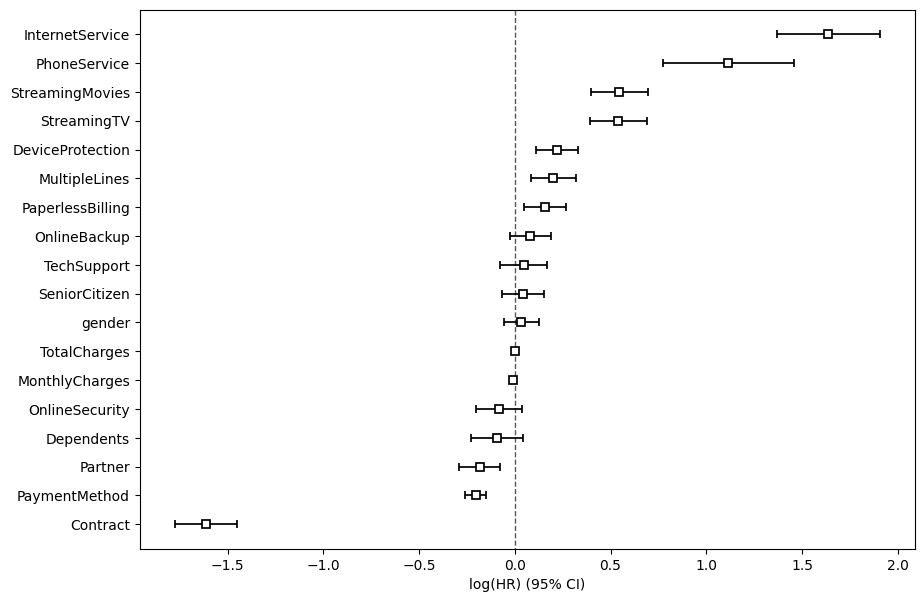

In [178]:
fig, ax = plt.subplots(figsize = (10,7))
cph.plot(ax = ax);

In [180]:
target = target.replace(np.nan, 0)

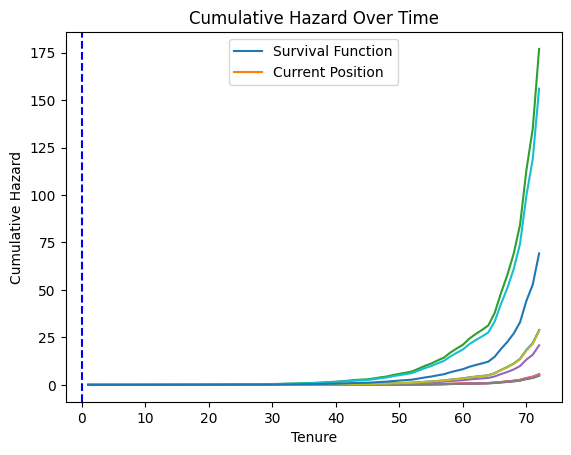

In [232]:
fig, ax = plt.subplots()
cph.predict_cumulative_hazard(target.iloc[0:11,:]).plot(ax = ax)
plt.axvline(x=target.iloc[0:11,:].tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Survival Function','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Cumulative Hazard', size = 10)
ax.set_title('Cumulative Hazard Over Time');

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,1,1,0,0,-1,0,1,0,1,1,1,0,2,1,2,52.55,0.0,0
753,0,0,0,1,0,1,0,-1,-1,-1,-1,-1,-1,-1,2,0,0,20.25,0.0,0
936,1,0,1,1,0,1,0,0,1,1,1,0,1,1,2,0,0,80.85,0.0,0
1082,0,0,1,1,0,1,1,-1,-1,-1,-1,-1,-1,-1,2,0,0,25.75,0.0,0
1340,1,0,1,1,0,0,-1,0,1,1,1,1,1,0,2,0,3,56.05,0.0,0
3331,0,0,1,1,0,1,0,-1,-1,-1,-1,-1,-1,-1,2,0,0,19.85,0.0,0
3826,0,0,1,1,0,1,1,-1,-1,-1,-1,-1,-1,-1,2,0,0,25.35,0.0,0
4380,1,0,1,1,0,1,0,-1,-1,-1,-1,-1,-1,-1,2,0,0,20.00,0.0,0
5218,0,0,1,1,0,1,0,-1,-1,-1,-1,-1,-1,-1,1,1,0,19.70,0.0,0
6670,1,0,1,1,0,1,1,0,0,1,1,1,1,0,2,0,0,73.35,0.0,0


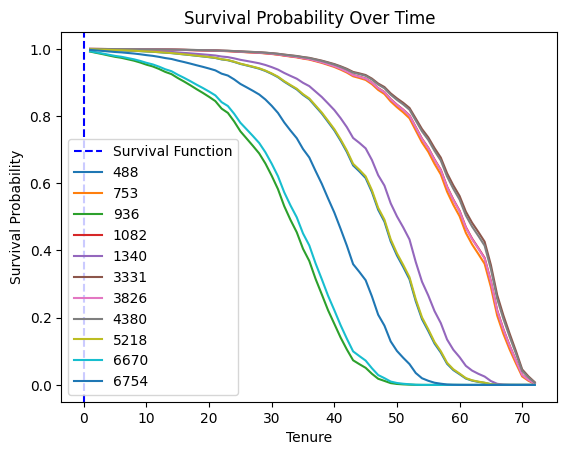

In [233]:
fig, ax = plt.subplots()
plt.axvline(x=target.iloc[0:11,:].tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Survival Function','Current Position'])
cph.predict_survival_function(target.iloc[0:11,:]).plot(ax = ax)
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Survival Probability', size = 10)
ax.set_title('Survival Probability Over Time')
target

In [185]:
def LTV(info):
    life = cph.predict_survival_function(info).reset_index()
    life.columns = ['Tenure', 'Probability']
    max_life = life.Tenure[life.Probability > 0.1].max()
    
    LTV = max_life * info['MonthlyCharges'].values[0]
    return LTV

In [227]:
print('LTV of a Customer 488 is:', LTV(target[0:1]), 'dollars.')
print('LTV of a Customer 753 is:', LTV(target[1:2]), 'dollars.')
print('LTV of a Customer 936 is:', LTV(target[2:3]), 'dollars.')
print('LTV of a Customer 1082 is:', LTV(target[3:4]), 'dollars.')
print('LTV of a Customer 1340 is:', LTV(target[4:5]), 'dollars.')
print('LTV of a Customer 3331 is:', LTV(target[5:6]), 'dollars.')
print('LTV of a Customer 3826 is:', LTV(target[6:7]), 'dollars.')
print('LTV of a Customer 4380 is:', LTV(target[7:8]), 'dollars.')
print('LTV of a Customer 5218 is:', LTV(target[8:9]), 'dollars.')
print('LTV of a Customer 6670 is:', LTV(target[9:10]), 'dollars.')
print('LTV of a Customer 6754 is:', LTV(target[10:11]), 'dollars.')

LTV of a Customer 488 is: 2942.7999999999997 dollars.
LTV of a Customer 753 is: 1377.0 dollars.
LTV of a Customer 936 is: 3395.7 dollars.
LTV of a Customer 1082 is: 1751.0 dollars.
LTV of a Customer 1340 is: 3306.95 dollars.
LTV of a Customer 3331 is: 1369.65 dollars.
LTV of a Customer 3826 is: 1723.8000000000002 dollars.
LTV of a Customer 4380 is: 1360.0 dollars.
LTV of a Customer 5218 is: 1122.8999999999999 dollars.
LTV of a Customer 6670 is: 3080.7 dollars.
LTV of a Customer 6754 is: 3095.0 dollars.
